In [1]:
from utils import parse_arguments, read_settings, plot_rewards, simulate_notebook
import matplotlib.pyplot as plt
import gymnasium as gym
import torch
from tqdm import tqdm
from agent import DQNAgent, DoubleDQNAgent
import os

In [2]:
device = torch.device('cuda' if torch.cuda.is_available(
) else 'mps' if torch.backends.mps.is_available() else 'cpu')

In [3]:
def train_dqn(env: gym.Env, agent: DQNAgent, episodes: int):
    episode_rewards = []
    for episode in tqdm(range(episodes), desc="Training: "):
        state, _ = env.reset()
        done = False
        total_reward = 0
        while not done:
            action = agent.act(state)
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            agent.remember(state, action, next_state, reward, done)
            state = next_state
            total_reward += reward
            agent.replay()

        # print("Episode: {}/{}, Total Reward: {}, Epsilon: {:.2}".format(
        #     episode+1, episodes, total_reward, agent.epsilon))
        episode_rewards.append(total_reward)
    return episode_rewards

In [4]:
print(f'{device = }')

ddqn_agent_settings = {'lr': 0.001,
                       'gamma': 0.95,
                       'epsilon': 1.0,
                       'epsilon_min': 0.01,
                       'epsilon_decay': 0.995,
                       'batch_size': 64,
                       'alpha': 1e-3,
                       'update_frequency': 4}

train_settings = {'episodes': 2000}
print(f'{ddqn_agent_settings =}')
print(f'{train_settings = }')

device = device(type='mps')
ddqn_agent_settings ={'lr': 0.001, 'gamma': 0.95, 'epsilon': 1.0, 'epsilon_min': 0.01, 'epsilon_decay': 0.995, 'batch_size': 64, 'alpha': 0.001, 'update_frequency': 4}
train_settings = {'episodes': 2000}


In [5]:
# Environment
env = gym.make('CartPole-v1', render_mode='rgb_array')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
checkpoint_folder = 'checkpoints'
os.makedirs(checkpoint_folder, exist_ok=True)

In [6]:
# Agent
dqn_agent_settings = {k: v for k, v in ddqn_agent_settings.items() if k not in [
    'alpha', 'update_frequency']}
agent = DQNAgent(state_size, action_size, **dqn_agent_settings)

dqn_rewards = train_dqn(env, agent, **train_settings)
DQNAgent.save_state(os.path.join(checkpoint_folder, 'DQNAgent.pth'))

Training:   0%|          | 0/2000 [00:00<?, ?it/s]/Users/youssefshaarawy/Library/CloudStorage/OneDrive-City,UniversityofLondon/Documents/MSc Files/INM707/Project/Advanced Task/agent.py:47: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)
  state_batch = torch.tensor(batch.state, dtype=torch.float32)
Training:   4%|▍         | 78/2000 [00:09<06:22,  5.02it/s] 

In [ ]:
# Agent
d_agent = DoubleDQNAgent(state_size, action_size, **ddqn_agent_settings)

ddqn_rewards = train_dqn(env, d_agent, **train_settings)
DoubleDQNAgent.save_state(os.path.join(
    checkpoint_folder, 'DoubleDQNAgent.pth'))

Training: 100%|██████████| 1000/1000 [00:44<00:00, 22.28it/s]


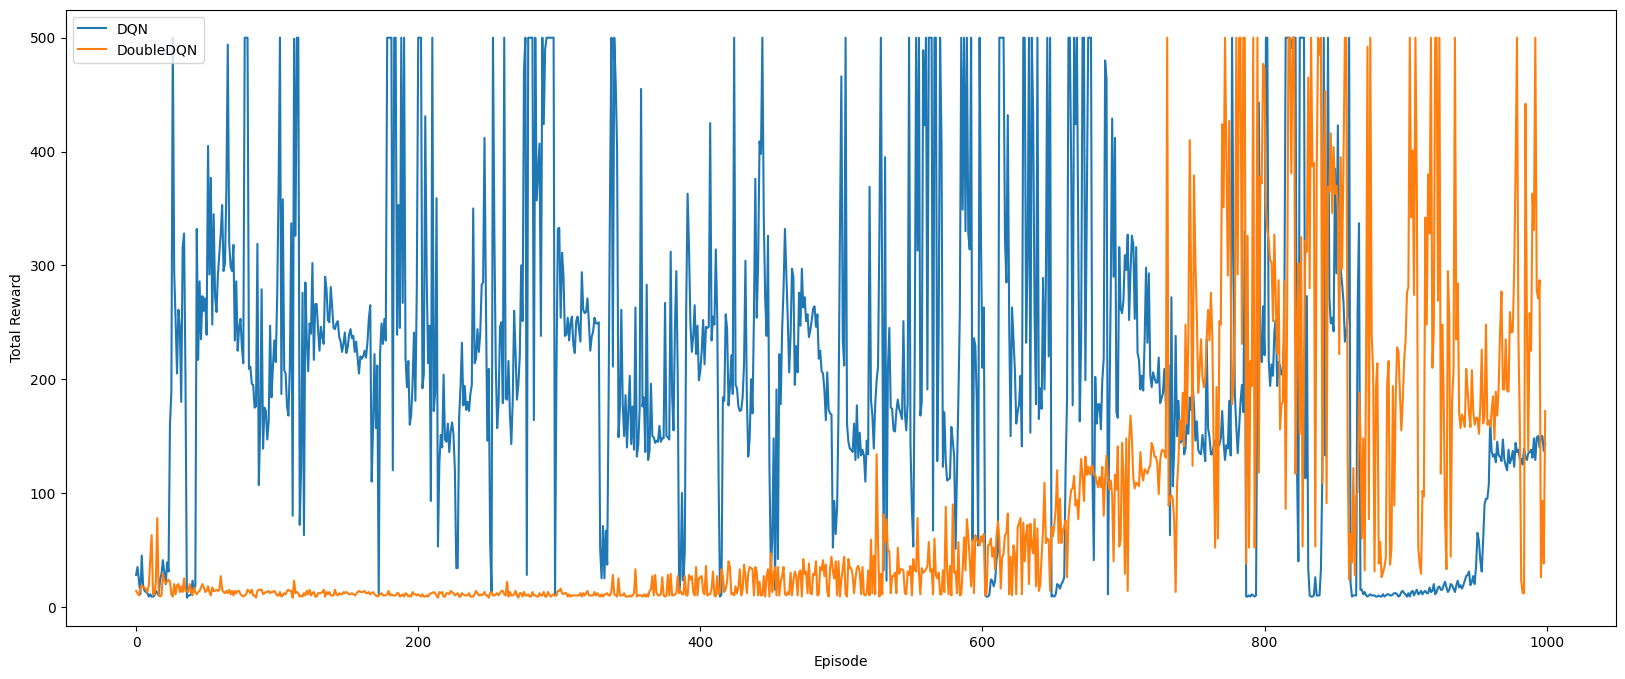

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(20, 8))
ax.plot(dqn_rewards, label='DQN')
ax.plot(ddqn_rewards, label='DoubleDQN')
ax.legend()
ax.set_ylabel("Total Reward")
ax.set_xlabel("Episode")
plt.show()

Total reward: 140.0	Steps: 140


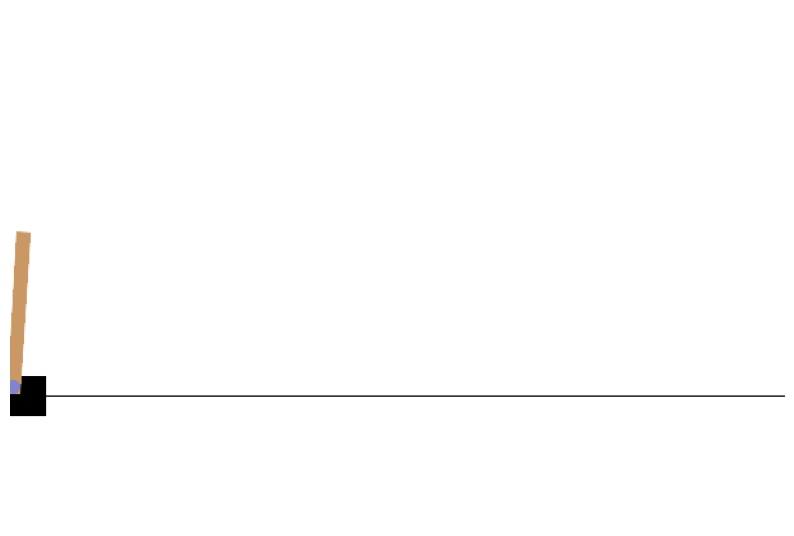

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(10, 8))
simulate_notebook(agent, env, ax)

Total reward: 270.0	Steps: 270


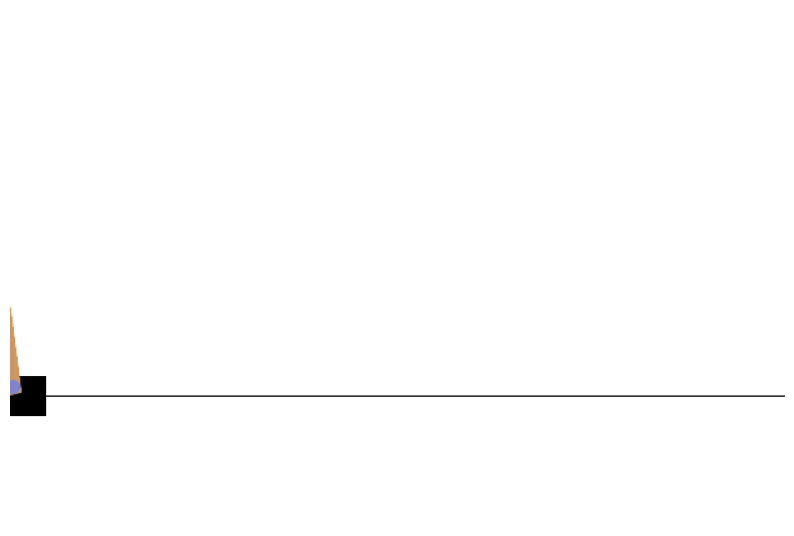

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(10, 8))
simulate_notebook(d_agent, env, ax)